## Jupyter notebook example for using scatterutils

In [2]:
import os
import glob
import psrchive
import numpy as np
import scatterutils_lofar as scat
import matplotlib.pyplot as plt

def get_pulseperiod(archive):
    ephem = archive.get_ephemeris()
    rot_freq = ephem.get_value('F0')
    pulseperiod = 1.0/float(rot_freq)
    return pulseperiod

# Method 1 -- turn archive into ascii

## Turn archive file into ascii with chosen number of frrequency channels

In [3]:
!ls *.ar

J1341-6220_2019-04-03-00:42:08_zap.16ch64s.ar
J1341-6220_2019-04-17-23:14:32_zap.16ch64s.ar


In [4]:
arfile = 'J1341-6220_2019-04-17-23:14:32_zap.16ch64s.ar'
asciifile = scat.archive_to_ascii(arfile,nchan=8,verbose=True)

Archive has been dedispersed, t-scrunched and p-scrunched
J1341-6220_2019-04-17-23:14:32_zap.16ch64s.ar.DTp8ch written to disk

Ascii saved as J1341-6220_2019-04-17-23:14:32_zap.16ch64s.ar.DTp8ch.ascii


In [5]:
asciifile

'J1341-6220_2019-04-17-23:14:32_zap.16ch64s.ar.DTp8ch.ascii'

## Obtain or hard-code pulse period

In [6]:
## Header of ascii file does not contain pulse period
arch = psrchive.Archive_load(arfile)
per = get_pulseperiod(arch)
print per

0.193339746306


## Run scattering fits  -- standard isotropic scattering model

Pulsar name: J1341-6220
Number of freq. channels: 8 
Freq channels will be labeled 0 - 7
Number of bins: 1024
RMS from ascii header: 0.000220
Tsub: 248.00 sec
--------------------------------------------------------
--------------------------------------------------------
Channel 0
peak bin at lowest freq channel:877
Rolling data by 365 bins
[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 5.1661e-05
    reduced chi-square = 5.0697e-08
    Akaike info crit   = -17195.5420
    Bayesian info crit = -17170.8846
[[Variables]]
    mu:     478.215739 +/- 0.94913895 (0.20%) (init = 512)
    sigma:  12.8997396 +/- 1.21313534 (9.40%) (init = 15)
    A:      0.00925925 +/- 9.1886e-04 (9.92%) (init = 0.0019352)
    tau:    152.643004 +/- 6.27292492 (4.11%) (init = 200)
    dc:    -4.4152e-06 +/- 1.0975e-05 (248.57%) (init = 0)
    nbins:  1024 (fixed)
[[Co

Channel 0
Tau (ms): 28.82 \pm 1.18
tau1GHz_alpha_4 (ms) ~ 22.7212
Channel 1
Tau (ms): 21.80 \pm 0.59
tau1GHz_alpha_4 (ms) ~ 25.4987
Channel 2
Tau (ms): 15.03 \pm 0.36
tau1GHz_alpha_4 (ms) ~ 24.5079
Channel 3
Tau (ms): 11.35 \pm 0.30
tau1GHz_alpha_4 (ms) ~ 25.8469
Channel 4
Tau (ms): 7.61 \pm 0.14
tau1GHz_alpha_4 (ms) ~ 24.0541
Channel 5
Tau (ms): 5.77 \pm 0.11
tau1GHz_alpha_4 (ms) ~ 24.0306
Channel 6
Tau (ms): 4.33 \pm 0.10
tau1GHz_alpha_4 (ms) ~ 22.9792
Channel 7
Tau (ms): 3.20 \pm 0.09
tau1GHz_alpha_4 (ms) ~ 22.3518

Plotting Gaussian fit parameters w.r.t frequency



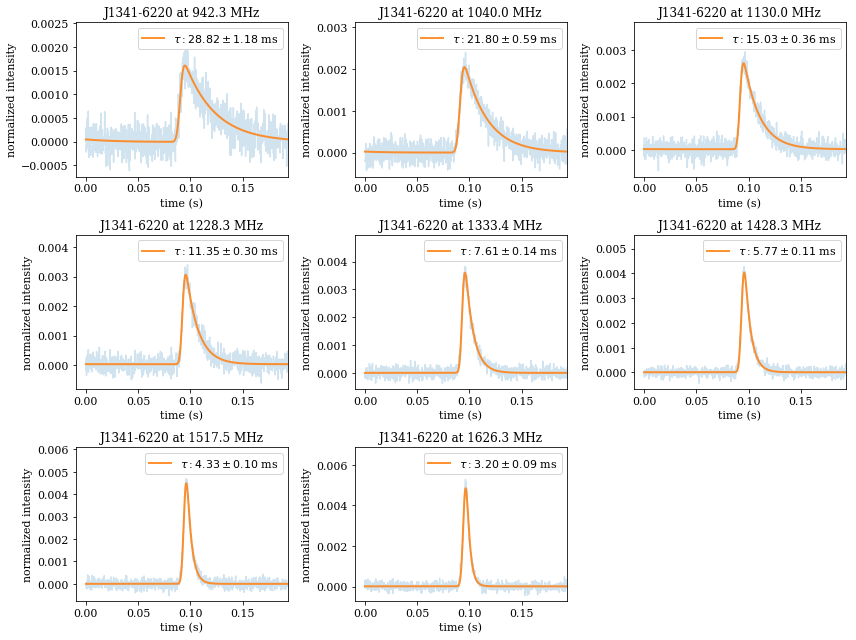

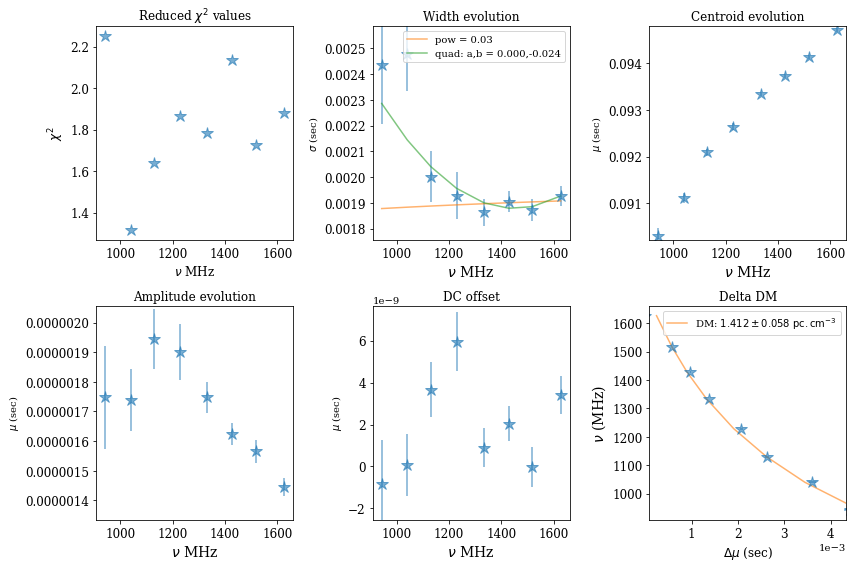

[[Variables]]
    exponent:  -4.36772794 +/- 0.07262973 (1.66%) (init = -4.102327)
    amplitude:  0.02696122 +/- 7.5812e-04 (2.81%) (init = 0.0245451)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.976

Plotting fitted tau-spectrum

[[Variables]]
    exponent:  -4.36772794 +/- 0.07262973 (1.66%) (init = -4.102327)
    amplitude:  0.02696122 +/- 7.5812e-04 (2.81%) (init = 0.0245451)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.976


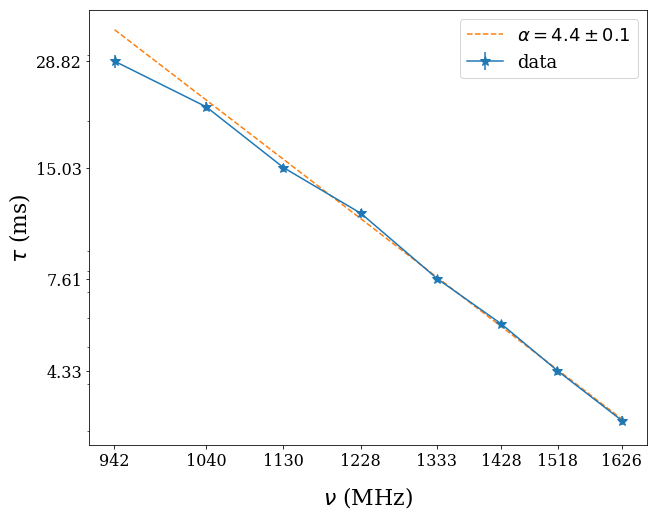

In [7]:
freqMHz, taussec, taustdssec =  scat.produce_taufits(asciifile, meth='iso', pulseperiod=per, snr_cut=5.0, verbose=True, plotparams=True,savefigure=False)
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum_noplot(freqMHz, taussec, taustdssec)

## or with plot
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum(freqMHz, taussec, taustdssec)

## Run scattering fits -- one dimensional extremely anisotropic scattering model

Pulsar name: J1341-6220
Number of freq. channels: 8 
Freq channels will be labeled 0 - 7
Number of bins: 1024
RMS from ascii header: 0.000220
Tsub: 248.00 sec
--------------------------------------------------------
--------------------------------------------------------
Channel 0
peak bin at lowest freq channel:877
Rolling data by 365 bins
[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 1024
    # variables        = 5
    chi-square         = 5.5790e-05
    reduced chi-square = 5.4750e-08
    Akaike info crit   = -17116.7888
    Bayesian info crit = -17092.1314
[[Variables]]
    mu:     493.834329 +/- 1.03109508 (0.21%) (init = 512)
    sigma:  26.3526678 +/- 1.13887435 (4.32%) (init = 15)
    A:      0.00643167 +/- 0.00103487 (16.09%) (init = 0.0019352)
    tau1:   716.902824 +/- 311.434856 (43.44%) (init = 200)
    dc:    -3.9420e-05 +/- 1.6651e-05 (42.24%) (init = 0)
    nbins:  1024 (fixed)
[

Channel 0
Tau (ms): 135.36 \pm 58.80
tau1GHz_alpha_4 (ms) ~ 106.7125
Channel 1
Tau (ms): 58.89 \pm 5.31
tau1GHz_alpha_4 (ms) ~ 68.8930
Channel 2
Tau (ms): 34.68 \pm 1.99
tau1GHz_alpha_4 (ms) ~ 56.5575
Channel 3
Tau (ms): 24.86 \pm 1.30
tau1GHz_alpha_4 (ms) ~ 56.5870
Channel 4
Tau (ms): 14.87 \pm 0.48
tau1GHz_alpha_4 (ms) ~ 47.0186
Channel 5
Tau (ms): 10.45 \pm 0.30
tau1GHz_alpha_4 (ms) ~ 43.4789
Channel 6
Tau (ms): 7.43 \pm 0.25
tau1GHz_alpha_4 (ms) ~ 39.3893
Channel 7
Tau (ms): 4.99 \pm 0.18
tau1GHz_alpha_4 (ms) ~ 34.8882

Plotting Gaussian fit parameters w.r.t frequency



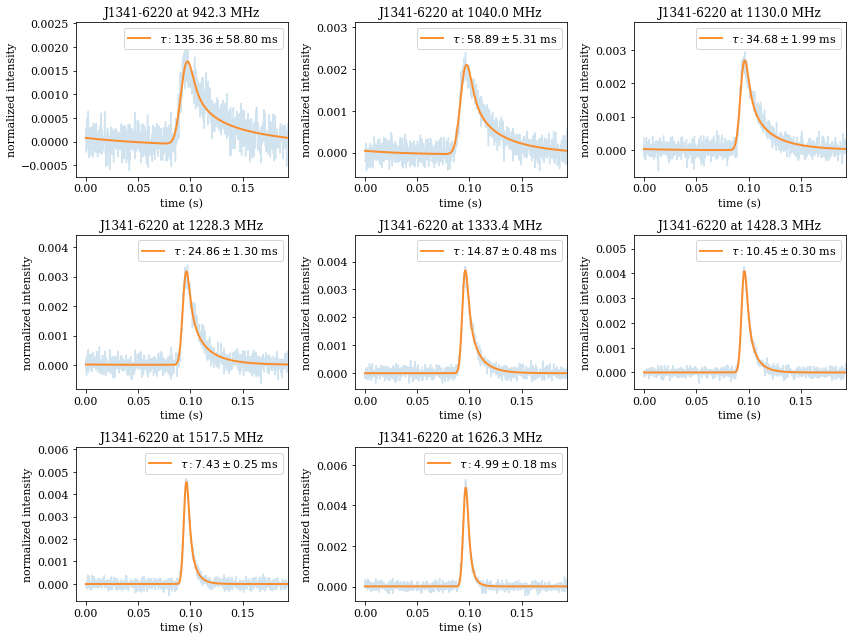

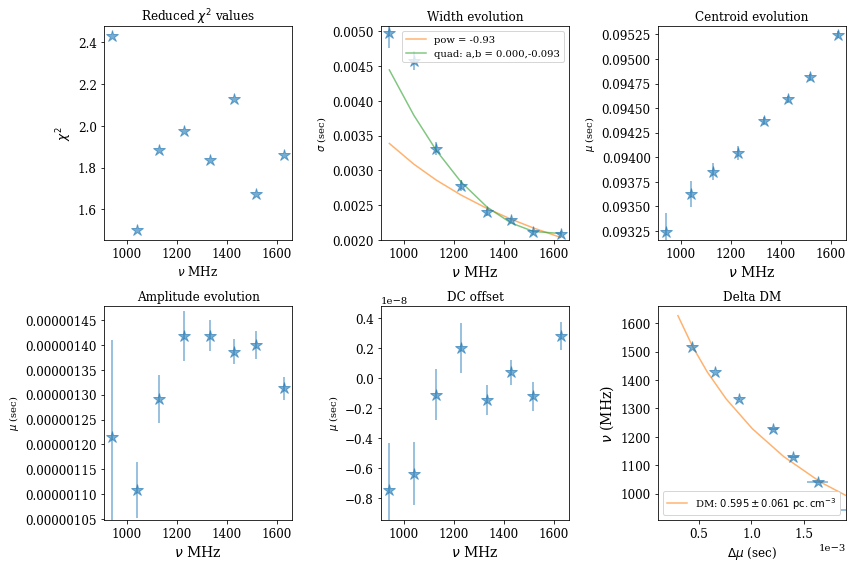

[[Variables]]
    exponent:  -5.59871278 +/- 0.05929891 (1.06%) (init = -5.806709)
    amplitude:  0.07624969 +/- 0.00192319 (2.52%) (init = 0.0811893)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.988

Plotting fitted tau-spectrum

[[Variables]]
    exponent:  -5.59871278 +/- 0.05929891 (1.06%) (init = -5.806709)
    amplitude:  0.07624969 +/- 0.00192319 (2.52%) (init = 0.0811893)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.988


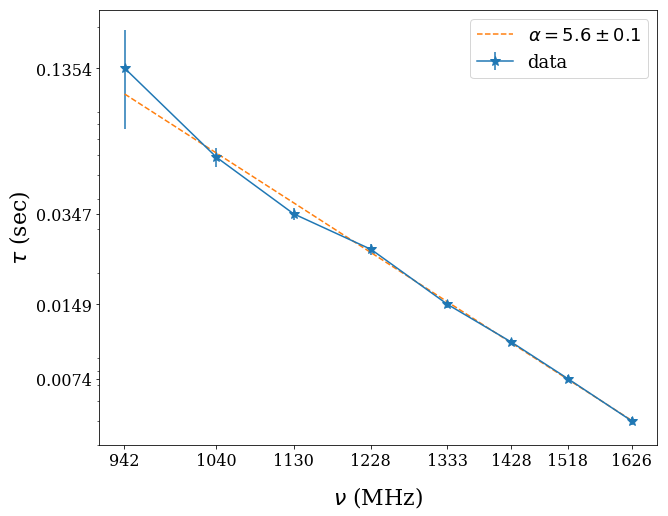

In [8]:
freqMHz, taussec, taustdssec =  scat.produce_taufits(asciifile, meth='onedim', pulseperiod=per, snr_cut=5.0, verbose=True, plotparams=True,savefigure=False)
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum_noplot(freqMHz, taussec, taustdssec)

## or with plot
freqMHz, alpha, alphaerr, fit = scat.produce_tauspectrum(freqMHz, taussec, taustdssec)

# Method 2 -- use get_data in psrchive

In [9]:
## Load dedispersed, t-scrunched, p-scrunched archive with 8 channels
arch = psrchive.Archive_load(arfile)
arch.remove_baseline()
arch.dedisperse()
arch.pscrunch()
arch.tscrunch()
arch.fscrunch_to_nchan(8)
data = arch.get_data()
nbins = arch.get_nbin()
nchan = arch.get_nchan()
print nchan, nbins

per = get_pulseperiod(arch)

data = data.reshape(nchan,nbins)
print np.shape(data)

8 1024
(8, 1024)


## Fit using isotropic scattering model

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 5.1663e-05
    reduced chi-square = 5.0699e-08
    Akaike info crit   = -17195.4994
    Bayesian info crit = -17170.8420
[[Variables]]
    mu:     843.215600 +/- 0.94910402 (0.11%) (init = 877)
    sigma:  12.8995909 +/- 1.21309683 (9.40%) (init = 15)
    A:      0.00925968 +/- 9.1889e-04 (9.92%) (init = 0.001934711)
    tau:    152.641296 +/- 6.27269475 (4.11%) (init = 200)
    dc:    -4.8030e-06 +/- 1.0975e-05 (228.51%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.948
    C(tau, dc)    = -0.610
    C(A, tau)     =  0.481
    C(mu, tau)    = -0.467
    C(mu, dc)     =  0.285
    C(A, dc)      = -0.237
    C(sigma, tau) = -0.231
    C(mu, A)      = -0.225
    C(mu, sigma)  =  0.108

Tau (ms): 28.82 \pm 1.18


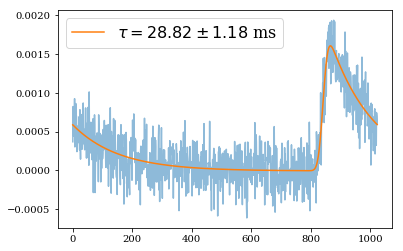

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.3549e-05
    reduced chi-square = 3.2923e-08
    Akaike info crit   = -17637.6039
    Bayesian info crit = -17612.9465
[[Variables]]
    mu:     847.525552 +/- 0.60228252 (0.07%) (init = 874)
    sigma:  13.1241829 +/- 0.75982959 (5.79%) (init = 15)
    A:      0.00920943 +/- 5.6078e-04 (6.09%) (init = 0.002397504)
    tau:    115.435648 +/- 3.14902321 (2.73%) (init = 200)
    dc:     5.1560e-07 +/- 7.9082e-06 (1533.77%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.950
    C(tau, dc)    = -0.533
    C(A, tau)     =  0.515
    C(mu, tau)    = -0.497
    C(sigma, tau) = -0.289
    C(mu, dc)     =  0.265
    C(mu, A)      = -0.256
    C(A, dc)      = -0.216
    C(mu, sigma)  =  0.144

Tau (ms): 21.80 \pm 0.59


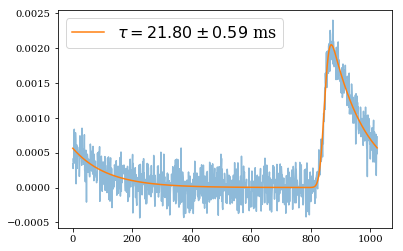

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.2785e-05
    reduced chi-square = 3.2173e-08
    Akaike info crit   = -17661.1874
    Bayesian info crit = -17636.5300
[[Variables]]
    mu:     852.724416 +/- 0.41762596 (0.05%) (init = 877)
    sigma:  10.6008771 +/- 0.52670598 (4.97%) (init = 15)
    A:      0.01030444 +/- 5.3525e-04 (5.19%) (init = 0.002952505)
    tau:    79.5982490 +/- 1.90482501 (2.39%) (init = 200)
    dc:     1.9308e-05 +/- 6.9415e-06 (35.95%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.956
    C(A, tau)     =  0.531
    C(mu, tau)    = -0.505
    C(tau, dc)    = -0.427
    C(sigma, tau) = -0.333
    C(mu, A)      = -0.268
    C(mu, dc)     =  0.216
    C(A, dc)      = -0.174
    C(mu, sigma)  =  0.168

Tau (ms): 15.03 \pm 0.36


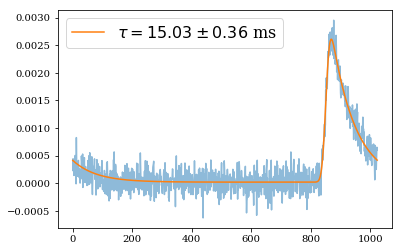

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 4.1862e-05
    reduced chi-square = 4.1081e-08
    Akaike info crit   = -17410.9132
    Bayesian info crit = -17386.2558
[[Variables]]
    mu:     855.664940 +/- 0.39612065 (0.05%) (init = 879)
    sigma:  10.2093475 +/- 0.48874340 (4.79%) (init = 15)
    A:      0.01006698 +/- 5.0526e-04 (5.02%) (init = 0.003398711)
    tau:    60.1313989 +/- 1.56423321 (2.60%) (init = 200)
    dc:     3.1134e-05 +/- 7.4190e-06 (23.83%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.952
    C(A, tau)     =  0.574
    C(mu, tau)    = -0.547
    C(sigma, tau) = -0.383
    C(tau, dc)    = -0.360
    C(mu, A)      = -0.314
    C(mu, sigma)  =  0.209
    C(mu, dc)     =  0.197
    C(A, dc)      = -0.159

Tau (ms): 11.35 \pm 0.30


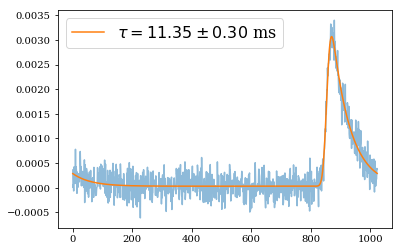

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.0604e-05
    reduced chi-square = 2.0219e-08
    Akaike info crit   = -18136.8319
    Bayesian info crit = -18112.1746
[[Variables]]
    mu:     859.341313 +/- 0.23546841 (0.03%) (init = 871)
    sigma:  9.86913909 +/- 0.27628140 (2.80%) (init = 15)
    A:      0.00925664 +/- 2.7322e-04 (2.95%) (init = 0.003819689)
    tau:    40.2955864 +/- 0.76223821 (1.89%) (init = 200)
    dc:     4.9483e-06 +/- 4.9459e-06 (99.95%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.945
    C(A, tau)     =  0.643
    C(mu, tau)    = -0.625
    C(sigma, tau) = -0.460
    C(mu, A)      = -0.402
    C(mu, sigma)  =  0.287
    C(tau, dc)    = -0.283
    C(mu, dc)     =  0.177
    C(A, dc)      = -0.144

Tau (ms): 7.61 \pm 0.14


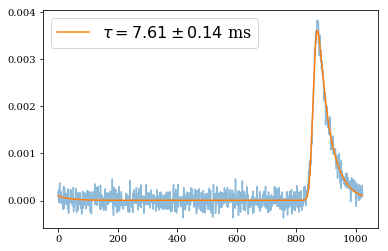

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6932e-05
    reduced chi-square = 1.6616e-08
    Akaike info crit   = -18337.8090
    Bayesian info crit = -18313.1516
[[Variables]]
    mu:     861.463359 +/- 0.20058804 (0.02%) (init = 872)
    sigma:  10.0889942 +/- 0.22168410 (2.20%) (init = 15)
    A:      0.00860337 +/- 2.0021e-04 (2.33%) (init = 0.004274828)
    tau:    30.5823798 +/- 0.55763476 (1.82%) (init = 200)
    dc:     1.1131e-05 +/- 4.3849e-06 (39.39%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.937
    C(A, tau)     =  0.698
    C(mu, tau)    = -0.695
    C(sigma, tau) = -0.525
    C(mu, A)      = -0.485
    C(mu, sigma)  =  0.365
    C(tau, dc)    = -0.239
    C(mu, dc)     =  0.166
    C(A, dc)      = -0.138

Tau (ms): 5.77 \pm 0.11


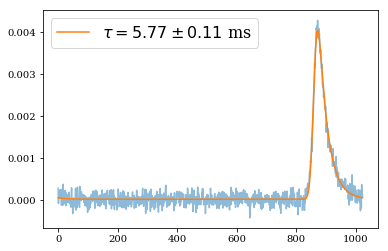

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.3902e-05
    reduced chi-square = 2.3457e-08
    Akaike info crit   = -17984.7640
    Bayesian info crit = -17960.1066
[[Variables]]
    mu:     863.620422 +/- 0.22401250 (0.03%) (init = 871)
    sigma:  9.92172918 +/- 0.23045032 (2.32%) (init = 15)
    A:      0.00828994 +/- 2.0396e-04 (2.46%) (init = 0.004688258)
    tau:    22.9480136 +/- 0.54398386 (2.37%) (init = 200)
    dc:     3.8702e-08 +/- 5.1198e-06 (13228.62%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.932
    C(mu, tau)    = -0.758
    C(A, tau)     =  0.745
    C(sigma, tau) = -0.586
    C(mu, A)      = -0.565
    C(mu, sigma)  =  0.445
    C(tau, dc)    = -0.201
    C(mu, dc)     =  0.152
    C(A, dc)      = -0.129

Tau (ms): 4.33 \pm 0.10


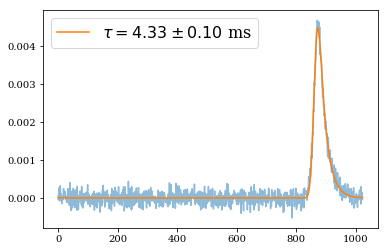

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.1537e-05
    reduced chi-square = 2.1136e-08
    Akaike info crit   = -18091.4445
    Bayesian info crit = -18066.7872
[[Variables]]
    mu:     866.619244 +/- 0.22377263 (0.03%) (init = 874)
    sigma:  10.2001469 +/- 0.20468223 (2.01%) (init = 15)
    A:      0.00765172 +/- 1.6134e-04 (2.11%) (init = 0.00528467)
    tau:    16.9223936 +/- 0.46220753 (2.73%) (init = 200)
    dc:     1.7931e-05 +/- 4.8005e-06 (26.77%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.926
    C(mu, tau)    = -0.833
    C(A, tau)     =  0.795
    C(sigma, tau) = -0.662
    C(mu, A)      = -0.662
    C(mu, sigma)  =  0.551
    C(tau, dc)    = -0.166
    C(mu, dc)     =  0.138
    C(A, dc)      = -0.122

Tau (ms): 3.20 \pm 0.09


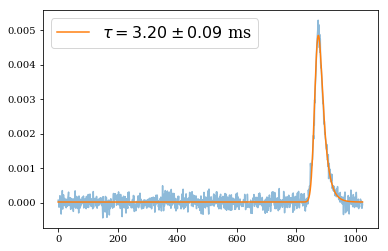

In [12]:
## parameter units are in bins

for i in range(nchan):
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_fitter(data[i],nbins,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print "Tau (ms): %.2f \pm %.2f" %(1000*tausec, 1000*taustdsec)
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()

## Fit using anisotropic scattering model

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 1024
    # variables        = 5
    chi-square         = 5.5794e-05
    reduced chi-square = 5.4753e-08
    Akaike info crit   = -17116.7326
    Bayesian info crit = -17092.0752
[[Variables]]
    mu:     858.833535 +/- 1.03130958 (0.12%) (init = 877)
    sigma:  26.3540681 +/- 1.13877472 (4.32%) (init = 15)
    A:      0.00643235 +/- 0.00103179 (16.04%) (init = 0.001934711)
    tau1:   717.118102 +/- 309.686785 (43.18%) (init = 200)
    dc:    -3.9822e-05 +/- 1.6643e-05 (41.79%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)   =  0.972
    C(tau1, dc)  = -0.817
    C(A, dc)     = -0.801
    C(mu, tau1)  = -0.321
    C(mu, A)     = -0.312
    C(mu, dc)    =  0.262
    C(sigma, dc) = -0.213
    C(sigma, A)  = -0.128

Tau (ms): 135.40 \pm 58.47


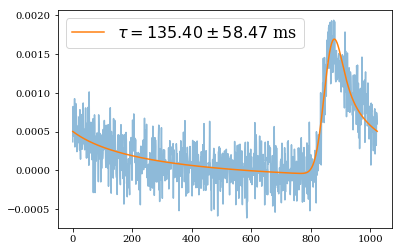

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.8293e-05
    reduced chi-square = 3.7579e-08
    Akaike info crit   = -17502.1610
    Bayesian info crit = -17477.5036
[[Variables]]
    mu:     860.855158 +/- 0.70203541 (0.08%) (init = 874)
    sigma:  24.2381107 +/- 0.73353501 (3.03%) (init = 15)
    A:      0.00587185 +/- 2.9616e-04 (5.04%) (init = 0.002397504)
    tau1:   311.892514 +/- 28.1015500 (9.01%) (init = 200)
    dc:    -3.3492e-05 +/- 1.0993e-05 (32.82%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)     =  0.855
    C(tau1, dc)    = -0.730
    C(A, dc)       = -0.628
    C(sigma, A)    = -0.597
    C(mu, tau1)    = -0.460
    C(mu, A)       = -0.394
    C(mu, dc)      =  0.336
    C(sigma, tau1) = -0.168

Tau (ms): 58.89 \pm 5.31


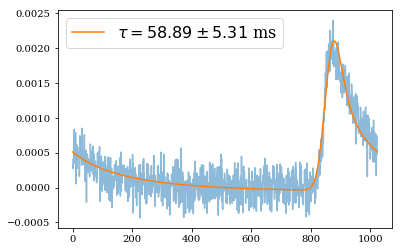

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.7722e-05
    reduced chi-square = 3.7019e-08
    Akaike info crit   = -17517.5446
    Bayesian info crit = -17492.8872
[[Variables]]
    mu:     862.076622 +/- 0.45943635 (0.05%) (init = 877)
    sigma:  17.5303798 +/- 0.49127711 (2.80%) (init = 15)
    A:      0.00684085 +/- 2.5803e-04 (3.77%) (init = 0.002952505)
    tau1:   183.690070 +/- 10.5503866 (5.74%) (init = 200)
    dc:    -5.9967e-06 +/- 9.0333e-06 (150.64%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau1)     =  0.769
    C(sigma, A)    = -0.746
    C(tau1, dc)    = -0.639
    C(A, dc)       = -0.489
    C(mu, tau1)    = -0.433
    C(mu, A)       = -0.333
    C(mu, dc)      =  0.276
    C(sigma, tau1) = -0.248
    C(mu, sigma)   =  0.107

Tau (ms): 34.68 \pm 1.99


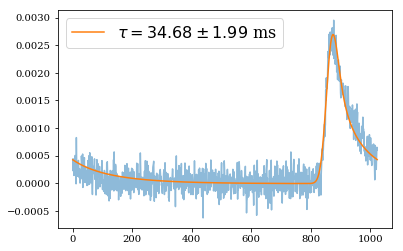

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 1024
    # variables        = 5
    chi-square         = 4.4401e-05
    reduced chi-square = 4.3573e-08
    Akaike info crit   = -17350.6033
    Bayesian info crit = -17325.9459
[[Variables]]
    mu:     863.073072 +/- 0.38762158 (0.04%) (init = 879)
    sigma:  14.7329925 +/- 0.41838912 (2.84%) (init = 15)
    A:      0.00750763 +/- 2.6922e-04 (3.59%) (init = 0.003398711)
    tau1:   131.645758 +/- 6.87453200 (5.22%) (init = 200)
    dc:     1.0224e-05 +/- 8.7197e-06 (85.29%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.795
    C(A, tau1)     =  0.739
    C(tau1, dc)    = -0.551
    C(mu, tau1)    = -0.436
    C(A, dc)       = -0.403
    C(mu, A)       = -0.322
    C(sigma, tau1) = -0.293
    C(mu, dc)      =  0.240
    C(mu, sigma)   =  0.128

Tau (ms): 24.86 \pm 1.30


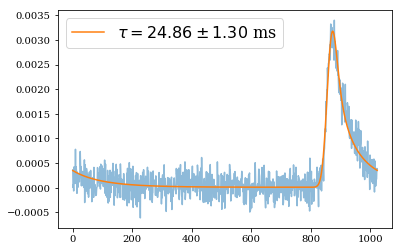

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.1225e-05
    reduced chi-square = 2.0829e-08
    Akaike info crit   = -18106.4079
    Bayesian info crit = -18081.7505
[[Variables]]
    mu:     864.794340 +/- 0.21594677 (0.02%) (init = 871)
    sigma:  12.6966789 +/- 0.23188999 (1.83%) (init = 15)
    A:      0.00751153 +/- 1.6536e-04 (2.20%) (init = 0.003819689)
    tau1:   78.7650552 +/- 2.56216555 (3.25%) (init = 200)
    dc:    -7.6435e-06 +/- 5.3349e-06 (69.80%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.832
    C(A, tau1)     =  0.733
    C(mu, tau1)    = -0.495
    C(tau1, dc)    = -0.411
    C(sigma, tau1) = -0.369
    C(mu, A)       = -0.363
    C(A, dc)       = -0.298
    C(mu, dc)      =  0.203
    C(mu, sigma)   =  0.183

Tau (ms): 14.87 \pm 0.48


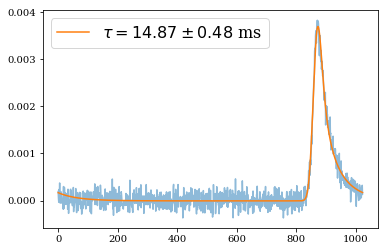

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6895e-05
    reduced chi-square = 1.6580e-08
    Akaike info crit   = -18340.0708
    Bayesian info crit = -18315.4134
[[Variables]]
    mu:     865.977801 +/- 0.17496297 (0.02%) (init = 872)
    sigma:  12.1237377 +/- 0.18400796 (1.52%) (init = 15)
    A:      0.00734266 +/- 1.3223e-04 (1.80%) (init = 0.004274828)
    tau1:   55.3324773 +/- 1.56774930 (2.83%) (init = 200)
    dc:     2.2391e-06 +/- 4.5375e-06 (202.65%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.845
    C(A, tau1)     =  0.748
    C(mu, tau1)    = -0.564
    C(sigma, tau1) = -0.430
    C(mu, A)       = -0.422
    C(tau1, dc)    = -0.333
    C(A, dc)       = -0.249
    C(mu, sigma)   =  0.242
    C(mu, dc)      =  0.188

Tau (ms): 10.45 \pm 0.30


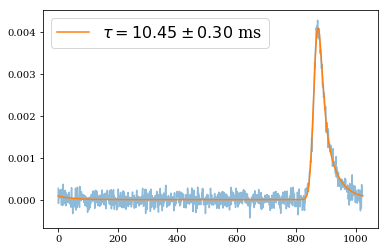

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.3220e-05
    reduced chi-square = 2.2787e-08
    Akaike info crit   = -18014.4145
    Bayesian info crit = -17989.7571
[[Variables]]
    mu:     867.160362 +/- 0.18414706 (0.02%) (init = 871)
    sigma:  11.2028120 +/- 0.18810736 (1.68%) (init = 15)
    A:      0.00741263 +/- 1.4601e-04 (1.97%) (init = 0.004688258)
    tau1:   39.3347605 +/- 1.31802788 (3.35%) (init = 200)
    dc:    -6.2556e-06 +/- 5.1550e-06 (82.41%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.855
    C(A, tau1)     =  0.766
    C(mu, tau1)    = -0.629
    C(sigma, tau1) = -0.486
    C(mu, A)       = -0.482
    C(mu, sigma)   =  0.306
    C(tau1, dc)    = -0.273
    C(A, dc)       = -0.211
    C(mu, dc)      =  0.172

Tau (ms): 7.43 \pm 0.25


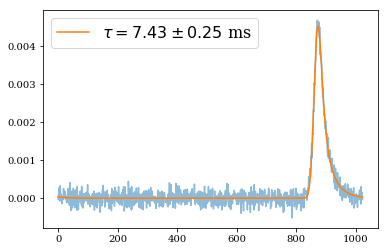

[[Model]]
    Model(GxETrain1D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.1275e-05
    reduced chi-square = 2.0878e-08
    Akaike info crit   = -18103.9937
    Bayesian info crit = -18079.3363
[[Variables]]
    mu:     869.468406 +/- 0.17991850 (0.02%) (init = 874)
    sigma:  11.0837270 +/- 0.17082913 (1.54%) (init = 15)
    A:      0.00695411 +/- 1.2436e-04 (1.79%) (init = 0.00528467)
    tau1:   26.4142857 +/- 0.95640038 (3.62%) (init = 200)
    dc:     1.4719e-05 +/- 4.8249e-06 (32.78%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)    = -0.864
    C(A, tau1)     =  0.800
    C(mu, tau1)    = -0.731
    C(mu, A)       = -0.584
    C(sigma, tau1) = -0.571
    C(mu, sigma)   =  0.417
    C(tau1, dc)    = -0.215
    C(A, dc)       = -0.179
    C(mu, dc)      =  0.157

Tau (ms): 4.99 \pm 0.18


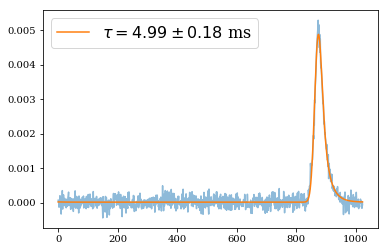

In [13]:
## parameter units are in bins

for i in range(nchan):
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_1D_fitter(data[i],nbins,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print "Tau (ms): %.2f \pm %.2f" %(1000*tausec, 1000*taustdsec)
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()

## Fit using isotropic scattering model - pick your own initial guesses for Gaussian parameters

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 5.1663e-05
    reduced chi-square = 5.0699e-08
    Akaike info crit   = -17195.4994
    Bayesian info crit = -17170.8420
[[Variables]]
    mu:     843.215630 +/- 0.94890430 (0.11%) (init = 877)
    sigma:  12.8999688 +/- 1.21313365 (9.40%) (init = 10)
    A:      0.00925941 +/- 9.1922e-04 (9.93%) (init = 0.001934711)
    tau:    152.640889 +/- 6.27285153 (4.11%) (init = 150)
    dc:    -4.8031e-06 +/- 1.0975e-05 (228.51%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.948
    C(tau, dc)    = -0.610
    C(A, tau)     =  0.480
    C(mu, tau)    = -0.467
    C(mu, dc)     =  0.285
    C(A, dc)      = -0.237
    C(sigma, tau) = -0.231
    C(mu, A)      = -0.224
    C(mu, sigma)  =  0.108

Order of best fit parameters are: sigma, mu, A,

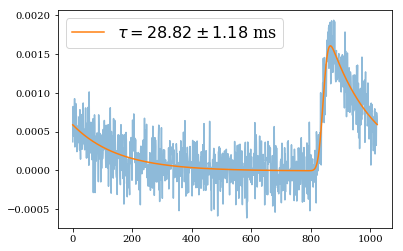

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.3549e-05
    reduced chi-square = 3.2923e-08
    Akaike info crit   = -17637.6039
    Bayesian info crit = -17612.9465
[[Variables]]
    mu:     847.525624 +/- 0.60204643 (0.07%) (init = 874)
    sigma:  13.1228223 +/- 0.75977879 (5.79%) (init = 10)
    A:      0.00921035 +/- 5.6113e-04 (6.09%) (init = 0.002397504)
    tau:    115.436530 +/- 3.14891379 (2.73%) (init = 150)
    dc:     5.1662e-07 +/- 7.9081e-06 (1530.75%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.950
    C(tau, dc)    = -0.533
    C(A, tau)     =  0.515
    C(mu, tau)    = -0.497
    C(sigma, tau) = -0.288
    C(mu, dc)     =  0.265
    C(mu, A)      = -0.256
    C(A, dc)      = -0.216
    C(mu, sigma)  =  0.143

Order of best fit parameters are: sigma, mu, A

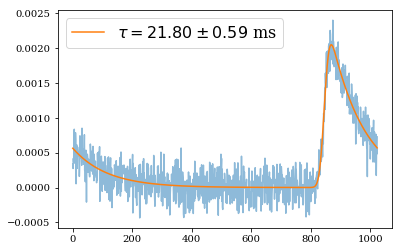

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 3.2785e-05
    reduced chi-square = 3.2173e-08
    Akaike info crit   = -17661.1874
    Bayesian info crit = -17636.5300
[[Variables]]
    mu:     852.724402 +/- 0.41761825 (0.05%) (init = 877)
    sigma:  10.6008422 +/- 0.52669873 (4.97%) (init = 10)
    A:      0.01030448 +/- 5.3525e-04 (5.19%) (init = 0.002952505)
    tau:    79.5983969 +/- 1.90476635 (2.39%) (init = 150)
    dc:     1.9308e-05 +/- 6.9415e-06 (35.95%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.956
    C(A, tau)     =  0.531
    C(mu, tau)    = -0.505
    C(tau, dc)    = -0.427
    C(sigma, tau) = -0.333
    C(mu, A)      = -0.268
    C(mu, dc)     =  0.216
    C(A, dc)      = -0.174
    C(mu, sigma)  =  0.168

Order of best fit parameters are: sigma, mu, A, 

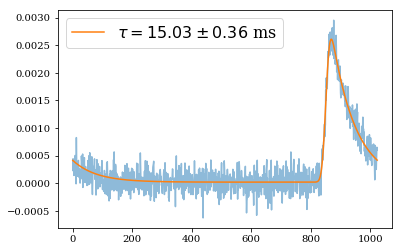

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 1024
    # variables        = 5
    chi-square         = 4.1862e-05
    reduced chi-square = 4.1081e-08
    Akaike info crit   = -17410.9132
    Bayesian info crit = -17386.2558
[[Variables]]
    mu:     855.664943 +/- 0.39611605 (0.05%) (init = 879)
    sigma:  10.2093508 +/- 0.48874349 (4.79%) (init = 10)
    A:      0.01006698 +/- 5.0527e-04 (5.02%) (init = 0.003398711)
    tau:    60.1313925 +/- 1.56423265 (2.60%) (init = 150)
    dc:     3.1134e-05 +/- 7.4190e-06 (23.83%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.952
    C(A, tau)     =  0.574
    C(mu, tau)    = -0.547
    C(sigma, tau) = -0.383
    C(tau, dc)    = -0.360
    C(mu, A)      = -0.314
    C(mu, sigma)  =  0.209
    C(mu, dc)     =  0.197
    C(A, dc)      = -0.159

Order of best fit parameters are: sigma, mu, A, 

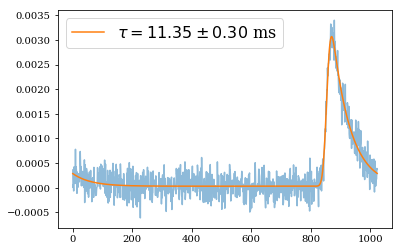

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.0604e-05
    reduced chi-square = 2.0219e-08
    Akaike info crit   = -18136.8319
    Bayesian info crit = -18112.1746
[[Variables]]
    mu:     859.341424 +/- 0.23544799 (0.03%) (init = 871)
    sigma:  9.86920793 +/- 0.27628244 (2.80%) (init = 10)
    A:      0.00925656 +/- 2.7325e-04 (2.95%) (init = 0.003819689)
    tau:    40.2953826 +/- 0.76223445 (1.89%) (init = 150)
    dc:     4.9486e-06 +/- 4.9459e-06 (99.95%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.945
    C(A, tau)     =  0.643
    C(mu, tau)    = -0.625
    C(sigma, tau) = -0.460
    C(mu, A)      = -0.402
    C(mu, sigma)  =  0.287
    C(tau, dc)    = -0.283
    C(mu, dc)     =  0.177
    C(A, dc)      = -0.144

Order of best fit parameters are: sigma, mu, A, 

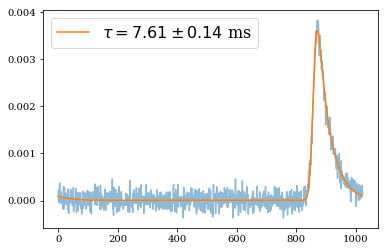

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 1024
    # variables        = 5
    chi-square         = 1.6932e-05
    reduced chi-square = 1.6616e-08
    Akaike info crit   = -18337.8090
    Bayesian info crit = -18313.1516
[[Variables]]
    mu:     861.463331 +/- 0.20059619 (0.02%) (init = 872)
    sigma:  10.0890377 +/- 0.22168640 (2.20%) (init = 10)
    A:      0.00860334 +/- 2.0020e-04 (2.33%) (init = 0.004274828)
    tau:    30.5823935 +/- 0.55764597 (1.82%) (init = 150)
    dc:     1.1131e-05 +/- 4.3849e-06 (39.39%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.937
    C(A, tau)     =  0.698
    C(mu, tau)    = -0.695
    C(sigma, tau) = -0.525
    C(mu, A)      = -0.485
    C(mu, sigma)  =  0.365
    C(tau, dc)    = -0.239
    C(mu, dc)     =  0.166
    C(A, dc)      = -0.138

Order of best fit parameters are: sigma, mu, A, 

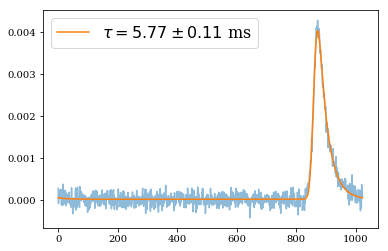

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.3902e-05
    reduced chi-square = 2.3457e-08
    Akaike info crit   = -17984.7640
    Bayesian info crit = -17960.1066
[[Variables]]
    mu:     863.620212 +/- 0.22404864 (0.03%) (init = 871)
    sigma:  9.92161879 +/- 0.23045278 (2.32%) (init = 10)
    A:      0.00829006 +/- 2.0393e-04 (2.46%) (init = 0.004688258)
    tau:    22.9483493 +/- 0.54401099 (2.37%) (init = 150)
    dc:     3.7119e-08 +/- 5.1198e-06 (13792.93%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.932
    C(mu, tau)    = -0.758
    C(A, tau)     =  0.745
    C(sigma, tau) = -0.586
    C(mu, A)      = -0.565
    C(mu, sigma)  =  0.445
    C(tau, dc)    = -0.201
    C(mu, dc)     =  0.152
    C(A, dc)      = -0.129

Order of best fit parameters are: sigma, mu, 

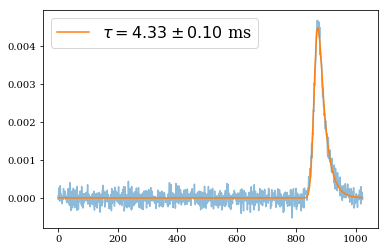

[[Model]]
    Model(GxETrain)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 5
    chi-square         = 2.1537e-05
    reduced chi-square = 2.1136e-08
    Akaike info crit   = -18091.4445
    Bayesian info crit = -18066.7872
[[Variables]]
    mu:     866.619055 +/- 0.22380532 (0.03%) (init = 874)
    sigma:  10.1999796 +/- 0.20468155 (2.01%) (init = 10)
    A:      0.00765185 +/- 1.6132e-04 (2.11%) (init = 0.00528467)
    tau:    16.9227222 +/- 0.46222186 (2.73%) (init = 150)
    dc:     1.7931e-05 +/- 4.8005e-06 (26.77%) (init = 0)
    nbins:  1024 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, A)   = -0.926
    C(mu, tau)    = -0.833
    C(A, tau)     =  0.795
    C(sigma, tau) = -0.662
    C(mu, A)      = -0.662
    C(mu, sigma)  =  0.551
    C(tau, dc)    = -0.166
    C(mu, dc)     =  0.138
    C(A, dc)      = -0.122

Order of best fit parameters are: sigma, mu, A, d

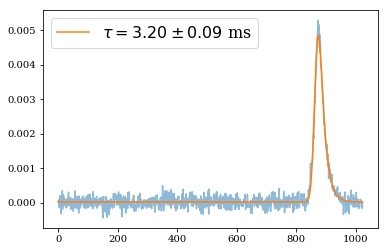

In [14]:
## parameter units are in bins
## Add your own initial guesses

for i in range(nchan):
    mu_guess = np.argmax(data[i])
    result, noiselessmodel, besttau, taustd, bestparams, bestparams_std, rchi, corsig = scat.tau_fitter_guess(data[i],nbins,mu_guess=mu_guess, sigma_guess=10.0,tau_guess=150.0,verbose=True)
    tausec, taustdsec = besttau*per/float(nbins), taustd*per/float(nbins)
    print "Tau (ms): %.2f \pm %.2f" %(1000*tausec, 1000*taustdsec)
    plt.figure()
    plt.plot(data[i], alpha=0.5)
    plt.plot(noiselessmodel, label=r'$\tau = %.2f \pm %.2f$ ms' %(1000*tausec, 1000*taustdsec))
    plt.legend(fontsize=16)
    plt.show()